## Import library

In [20]:
# Import statements
import pandas as pd
import numpy as np

## 1. Import the data set into a Pandas DataFrame

In [21]:
movie_df = pd.read_csv(r'Movie Data.csv')

In [22]:
# Print first 5 rows to review
movie_df.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


## 2. Generate descriptive statistics for the budget of all the movies.

In [23]:
movie_df[["budget"]].describe().applymap(lambda x: f"{x:,.0f}")

,budget
count,100
mean,"78,384,000"
std,"74,452,947"
min,"3,000,000"
25%,"15,750,000"
50%,"42,250,000"
75%,"150,000,000"
max,"260,000,000"


## 3. Find out how many of the top-rated movies produced in the United States have a PG-13 rating.

In [24]:
#declare variables
country = 'USA'
content_rating = 'PG-13'
# Determine number of movies produced in the "USA" have a "PG-13" rating
print(f'Number of top-rated movies produced in the {country} have a {content_rating} rating is: {len(movie_df[(movie_df["Country"] == country) & (movie_df["content_rating"] == content_rating)])}')

Number of top-rated movies produced in the USA have a PG-13 rating is: 35


## 4. Find out whether any of the top-rated movies produced in 2014 were not produced in the United States.

In [25]:
# declare variables
country = 'USA'
produced_year = 2014
number_of_movies = len(movie_df[(movie_df["Country"] != country) & (movie_df["title_year"] == produced_year)])

# Determine whether any movies produced in 2014 which were not produced in the US
print('There is at least one top-rated movies which were produced in 2014 and not in the United States: ''True' if number_of_movies > 0 else 'False')

There is at least one top-rated movies which were produced in 2014 and not in the United States: True


## 5. Find the percentage of the top-rated movies that are in:
- 1 genre only
- 2 genres only
- 3 genres only

In [26]:
# Replace NaN values to ''
movie_genre_df = movie_df[['Title','genre_1','genre_2','genre_3']].fillna('')

# Get total number of  movies in the data frame
total_movie = len(movie_df)
# Get total number of  movies in 1 genre only
total_movie_1genre = movie_genre_df[(movie_genre_df['genre_1'] != '') & (movie_genre_df['genre_2'] == '') & (movie_genre_df['genre_3'] == '')]['Title'].count()
# Get total number of  movies in 2 genres only
total_movie_2genres = movie_genre_df[(movie_genre_df['genre_1'] != '') & ((movie_genre_df['genre_2'] != '') & (movie_genre_df['genre_3'] == '')
                                                                          | (movie_genre_df['genre_2'] == '') & (movie_genre_df['genre_3'] != '')
                                                                         )]['Title'].count()
# Get total number of  movies in 3 genres only
total_movie_3genres = movie_genre_df[(movie_genre_df['genre_1'] != '') & ((movie_genre_df['genre_2'] != '') & (movie_genre_df['genre_3'] != ''))]['Title'].count()

print(f"The percentage of top-rated movies that are in 1 genre only: {(total_movie_1genre / total_movie) * 100:.0f}%")
print(f"The percentage of top-rated movies that are in 2 genres only: {(total_movie_2genres / total_movie) * 100:.0f}%")
print(f"The percentage of top-rated movies that are in 3 genres only: {(total_movie_3genres / total_movie) * 100:.0f}%")

The percentage of top-rated movies that are in 1 genre only: 3%
The percentage of top-rated movies that are in 2 genres only: 23%
The percentage of top-rated movies that are in 3 genres only: 74%


## 6. Convert the budget and gross values from “dollars” to “dollars in millions” for all top-rated movies. Round the converted values down to 3 decimal places. For example, a value of 192,345,273 should be converted to 192.345.

In [27]:
# Apply lambda function to convert budget and gross values from dollars to dollars in millions then round down to 3 decimal places
movie_df[['budget','Gross']] = movie_df[['budget','Gross']].applymap(lambda value: round(value / 1000000, 3))
# Print out the movie data frame to check
movie_df

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30.0,151.102,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150.0,341.268,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12.0,51.739,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47.0,100.546,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9.0,47.695,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Whiplash,2014,3.3,13.092,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA
96,Before Midnight,2013,3.0,8.115,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,...,7.8,7.6,7.3,7.4,7.2,7.0,8.0,7.9,R,USA
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA
98,Harry Potter and the Deathly Hallows: Part I,2010,150.0,296.348,Rupert Grint,Toby Jones,Alfred Enoch,10000,2000.0,1000.0,...,7.3,8.1,7.4,7.3,8.0,6.7,7.9,7.5,PG-13,UK


## 7. List all details for the top 10 movies with the highest profit, sorted from highest to lowest. Hint: Profit is not a column in the DataFrame. You will need to calculate it.

In [28]:
# Calculate Profit column base on Gross and Budget columns
movie_df['profit'] = movie_df['Gross'] - movie_df['budget']

# Determine top 10 movies details with the highest profit
movie_df.sort_values(by="profit", ascending=False).head(10)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662
11,The Avengers,2012,220.0,623.280,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.280
47,Deadpool,2016,58.0,363.024,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024
32,The Hunger Games: Catching Fire,2013,130.0,424.646,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.646
12,Toy Story 3,2010,200.0,414.984,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984
8,The Dark Knight Rises,2012,250.0,448.131,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.131
45,The Lego Movie,2014,60.0,257.756,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756
1,Zootopia,2016,150.0,341.268,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268
41,Despicable Me,2010,69.0,251.502,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,...,7.9,7.6,7.5,7.9,7.0,7.6,7.6,PG,USA,182.502
18,Inside Out,2015,175.0,356.454,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.454


## 8. Generate a list of all the actors, in alphabetical order by the first name, that have starred in a top-rated movie. If an actor has starred in multiple movies, their name should appear only once on the list. Assume that all actors’ names are in the format <first_name> <last_name>.

In [29]:
# Create an empty list to store actors name
actors=[]
# Get the first actor name column from the data frame and set values to list actors
actors = movie_df['actor_1_name'].values.tolist()
# Get the second actor name column from the data frame and extend values to list actors
actors.extend(movie_df['actor_2_name'].values.tolist())
# Get the third actor name column from the data frame and extend values to list actors
actors.extend(movie_df['actor_3_name'].values.tolist())
# Create a new list by removing duplicated actor name by using set
distinct_actors = list(set(actors))
# Sort the list
distinct_actors.sort()
# Print out the list actors
print(distinct_actors)

['0', 'Abraham Benrubi', 'Adam Brown', 'Aidan Quinn', 'Aidan Turner', 'Albert Brooks', 'Albert Finney', 'Aldis Hodge', 'Alexandra Maria Lara', 'Alfred Enoch', 'Alison Brie', 'Allen Leech', 'America Ferrera', 'Amiée Conn', 'Amy Adams', 'Amy Poehler', 'Amy Ryan', 'Amy Warren', 'Andrew Garfield', 'Anna Kendrick', 'Anne Hathaway', 'Ariane Labed', 'Athina Rachel Tsangari', 'Ato Essandoh', 'Audrey Fleurot', 'Basher Savage', 'Ben Foster', 'Benedict Cumberbatch', 'Benedict Wong', 'Bernardo Saracino', 'Beth Grant', 'Bill Murray', 'Billy Crudup', 'Bob Balaban', 'Brad Garrett', 'Brad Pitt', 'Bradley Cooper', 'Brian Johnson', "Brian d'Arcy James", 'Bruce Dern', 'Bruce Green', 'Bruce Greenwood', 'Bruce Willis', 'Bryce Dallas Howard', 'BÃ©rÃ©nice Bejo', 'Casey Affleck', 'Charlie Talbert', 'Charlize Theron', 'Chelan Simmons', 'Chiwetel Ejiofor', 'ChloÃ« Grace Moretz', 'Chris Evans', 'Chris Hemsworth', 'Chris Mulkey', 'Chris Pine', 'Christian Bale', 'Christoph Waltz', 'Christopher Lee', 'Clea DuVall',

## 9. The movie studio wants to determine who it should approach to act in its next movie production. Find the top 3 actors who appeared in the most top-rated movies.

In [35]:
# Create a Series on the actors list and count each actor name occurred
actors_ser = pd.Series(actors).value_counts()
# Determine top 3 actors appeared in the most top-rated movies
print(f"The top 3 actors appeared in the most top-rated movies are: {actors_ser.nlargest(3)}")

The top 3 actors appeared in the most top-rated movies are: Tom Hardy            5
Leonardo DiCaprio    5
Jennifer Lawrence    4
dtype: int64


## 10. Create a data visualization that shows each country and the number of top-rated movies produced in it. Find the country that produced the most top-rated movies.

In [33]:
# Import library
import matplotlib.pyplot as plt

# Create movie statistic data frame by counting the number of movie produced by each country
movie_stats_df = movie_df['Country'].value_counts().to_frame()
movie_stats_df

,Country
USA,81
UK,11
Australia,3
France,3
Spain,1
Canada,1


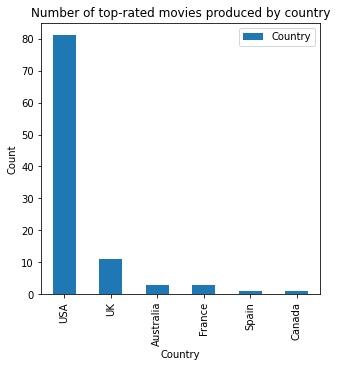

In [36]:
# Prepare chart parameter
movie_stats_df.plot(kind='bar', y='Country', figsize=(5, 5));
plt.title('Number of top-rated movies produced by country')
plt.xlabel('Country')
plt.ylabel('Count')
# Display the chart
plt.show()